In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
df=pd.read_csv("fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [9]:
def parse_pixels(pixel_string):
    pixels = np.array(pixel_string.split(), dtype='int')
    image = pixels.reshape((48, 48,1))  
    return image
df['image'] = df['pixels'].apply(parse_pixels)

In [10]:
df

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


In [11]:
images = np.stack(df['image'].values) / 255.0 
df 

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


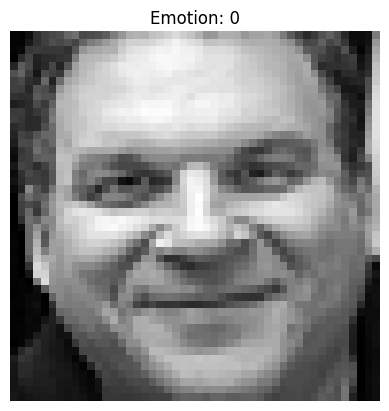

In [12]:
import matplotlib.pyplot as plt
sample_image = df['image'].iloc[14]
plt.imshow(sample_image.reshape(48, 48), cmap='gray')
plt.title(f"Emotion: {df['emotion'].iloc[0]}")
plt.axis('off')
plt.show()


In [13]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = df[df['Usage']=='Training']
test_data = df[df['Usage']=='PublicTest']

train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [15]:
train_generator = train_data_gen.flow(
    x=np.stack(train_data['image'].values),  
    y=pd.get_dummies(train_data['emotion']),  
    batch_size=64,
    shuffle=True
)
validation_generator = test_data_gen.flow(
    x=np.stack(test_data['image'].values),
    y=pd.get_dummies(test_data['emotion']),
    batch_size=64,
    shuffle=False  
)

print("Training data shape:", train_data.shape)
print("Testing/validation data shape:", test_data.shape)


Training data shape: (28709, 4)
Testing/validation data shape: (3589, 4)


In [30]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json


emotion_model_1 = Sequential() 
  
emotion_model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  
                         input_shape=(48, 48, 1))) 
emotion_model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Dropout(0.25)) 
  
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Dropout(0.25)) 
  
emotion_model_1.add(Flatten()) 
emotion_model_1.add(Dense(1024, activation='relu')) 
emotion_model_1.add(Dropout(0.5)) 
emotion_model_1.add(Dense(7, activation='softmax')) 
  
emotion_model_1.summary() 
  
cv2.ocl.setUseOpenCL(False) 
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,  
                               decay_rate=0.96) 
  
optimizer = Adam(learning_rate=lr_schedule) 
  
emotion_model_1.compile(loss='categorical_crossentropy', optimizer=optimizer,  
                      metrics=['accuracy']) 

c:\Users\anush\OneDrive\Documents\Mood-Based-Music-Recommendation-System\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = emotion_model_1.fit( 
    train_generator, 
    steps_per_epoch=28709//64,  # Number of batches per epoch (total training samples // batch size)
    epochs=10,                   # Number of epochs (complete passes through the dataset)
    validation_data=validation_generator, 
    validation_steps=3589//64    # Number of batches for validation (total validation samples // batch size)
)

emotion_model_1.evaluate(validation_generator)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2404 - loss: 1.8278 - val_accuracy: 0.2944 - val_loss: 1.7522
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.2031 - loss: 1.8134 - val_accuracy: 0.6000 - val_loss: 1.5285
Epoch 3/10
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:09 155ms/step - accuracy: 0.2031 - loss: 1.9165

C:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.3254 - loss: 1.7011 - val_accuracy: 0.4057 - val_loss: 1.5720
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.4062 - loss: 1.5543 - val_accuracy: 0.4000 - val_loss: 1.2768
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 51s 114ms/step - accuracy: 0.3919 - loss: 1.5781 - val_accuracy: 0.4305 - val_loss: 1.5039
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.4531 - loss: 1.4076 - val_accuracy: 0.4000 - val_loss: 1.1810
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.4243 - loss: 1.5032 - val_accuracy: 0.4621 - val_loss: 1.4383
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.4219 - loss: 1.4895 - val_accuracy: 0.4000 - val_loss: 1.1876
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 54s 121ms/step - accuracy: 0.4491 - loss: 1.4360 - val_accuracy: 0.4746 - val_loss: 1.3864
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.5312 - loss: 1.3880 - val_accura

[1.3844187259674072, 0.47422680258750916]

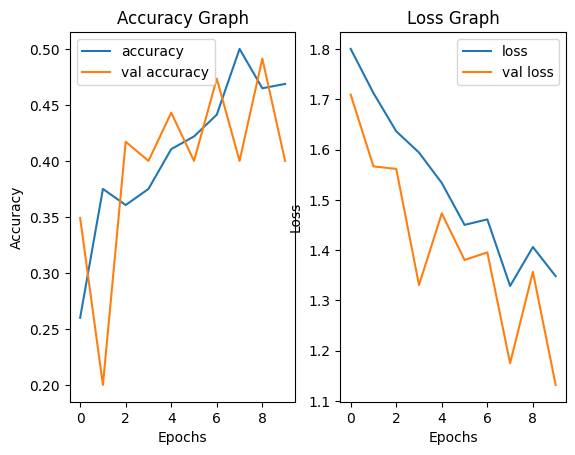

In [15]:
accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt 

# Accuracy graph 
plt.subplot(1, 2, 1) 
plt.plot(accuracy, label='accuracy') 
plt.plot(val_accuracy, label='val accuracy') 
plt.title('Accuracy Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

# Loss graph 
plt.subplot(1, 2, 2) 
plt.plot(loss, label='loss') 
plt.plot(val_loss, label='val loss') 
plt.title('Loss Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show() 


In [32]:
emotion_model_1.save('emotion_model_1.h5')


## Model 2


In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2

In [18]:
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
df['emotion_label'] = df['emotion'].map(emotion_map)
df

,emotion,pixels,Usage,image,emotion_label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6...",Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1...",Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1...",Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2...",Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],...",Neutral
...,...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3...",Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1...",Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1...",Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6...",Happy


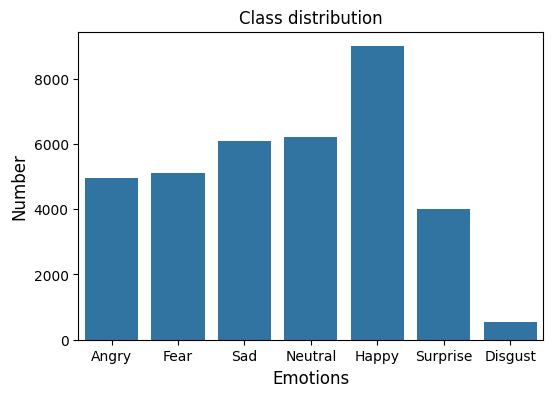

In [20]:
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x= emotion_counts.emotion, y = emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [21]:
df= df[df['emotion_label'] != 'Disgust']
df.emotion_label.value_counts()

emotion_label
Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Name: count, dtype: int64

In [22]:
data=df.drop('emotion_label',axis=1)
data

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


In [23]:
data.to_csv('data.csv')


In [3]:
num_classes = 7 
width, height = 48, 48
num_epochs = 50
batch_size = 64
num_features = 64
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam


# Initialize the model
model = Sequential()

# Module 1
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Module 2
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Module 3
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(2*2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


c:\Users\anush\OneDrive\Documents\Mood-Based-Music-Recommendation-System\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             

 Total params: 2,137,991 (8.16 MB)

 Trainable params: 2,134,407 (8.14 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [26]:
# Assuming you have `train_generator` and `validation_generator` defined
history1 = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 1475s 3s/step - accuracy: 0.3339 - loss: 1.7065 - val_accuracy: 0.2474 - val_loss: 1.7813
Epoch 2/10


C:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

## Mood Recognition with HaarCascade

In [35]:
# Define the emotion dictionary
emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}  # Update with your actual emotions

def emotion_recog(frame, model, face_cascade_path='haarcascade_frontalface_default.xml'):
    # Prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # Load the Haar Cascade for face detection
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + face_cascade_path)

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = facecasc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        
        # Extract the region of interest (ROI) for emotion detection
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        
        # Make prediction on the ROI
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        
        # Annotate the frame with the predicted emotion
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return frame

In [42]:
# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Perform emotion recognition
    output_frame = emotion_recog(frame, emotion_model_1)

    # Display the resulting frame
    cv2.imshow('Emotion Recognition', output_frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━